**Autor**: Victor Teixidó López

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

!pip install apafib --upgrade --user --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 3)

# ORIGINAL O TRADUCCIÓN

A veces nos interesa saber si un texto corresponde a la fuente original o ha sido derivado de ella de alguna manera. En este problema vamos a intentar averiguar si un texto proviene de la lengua original (Inglés) o es una traducción. Utilizaremos fragmentos extraídos al azar de obras de autores de diferentes épocas y géneros con el objeto de comprobar si realmente se puede realizar esa clasificación. Estos están escritos en inglés, pero algunos de ellos han sido traducidos de otros idiomas, como el ruso, el francés o el italiano entre otros.

Trabajaremos con un conjunto de datos compuesto por fragmentos de obras de 20 autores seleccionados.

In [3]:
from apafib import load_translation

translation_data = load_translation()
Xn = translation_data[0]
yn = translation_data[1]

# Apartado a

Generamos matrices de datos variando el tamaño del vocabulario, usaremos 2500 y 5000 palabras, ya que nos imaginamos que decidir en este problema estará en los detalles. Podemos generar la matriz de datos para que contenga solo si las palabras aparecen o no en cada ejemplo o el número de veces que aparecen, utilizaremos las dos opciones. Con esto obtenemos cuatro conjuntos de datos diferentes. 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

X2500_bin = CountVectorizer(max_features=2500, stop_words="english", binary=True).fit_transform(Xn)

X2500_freq = CountVectorizer(max_features=2500, stop_words="english").fit_transform(Xn)

X5000_bin = CountVectorizer(max_features=5000, stop_words="english", binary=True).fit_transform(Xn)

X5000_freq = CountVectorizer(max_features=5000, stop_words="english").fit_transform(Xn)

Vamos a generar una partición de entrenamiento y una de test (80 %/20 %) que sea estratificada. Realizamos una partición para cada una de las matrices generadas anteriorimente.

In [5]:
from sklearn.model_selection import train_test_split

X2500_bin_train, X2500_bin_test, y2500_bin_train, y2500_bin_test = train_test_split(X2500_bin, yn, test_size=0.8, random_state=8, stratify=yn)

X2500_freq_train, X2500_freq_test, y2500_freq_train, y2500_freq_test = train_test_split(X2500_freq, yn, test_size=0.8, random_state=8, stratify=yn)

X5000_bin_train, X5000_bin_test, y5000_bin_train, y5000_bin_test = train_test_split(X5000_bin, yn, test_size=0.8, random_state=8, stratify=yn)

X5000_freq_train, X5000_freq_test, y5000_freq_train, y5000_freq_test = train_test_split(X5000_freq, yn, test_size=0.8, random_state=8, stratify=yn)

# Apartado b

Para visualizar los datos representados en cada una de las matrices, utilizamos el método de visualización de t-SNE. Realizamos una visualización para cada una de las particiones.

##  Binary

In [6]:
from sklearn.manifold import TSNE

X2500_bin_tsne = TSNE(perplexity=15, early_exaggeration=15, metric='cosine', n_jobs=-1).fit_transform(X2500_bin_train)
data2500_bin = pd.DataFrame({'TSNE1':X2500_bin_tsne[:,0], 'TSNE2':X2500_bin_tsne[:,1],'class':y2500_bin_train})

X5000_bin_tsne = TSNE(perplexity=15, early_exaggeration=15, metric='cosine', n_jobs=-1).fit_transform(X5000_bin_train)
data5000_bin = pd.DataFrame({'TSNE1':X5000_bin_tsne[:,0], 'TSNE2':X5000_bin_tsne[:,1],'class':y5000_bin_train})

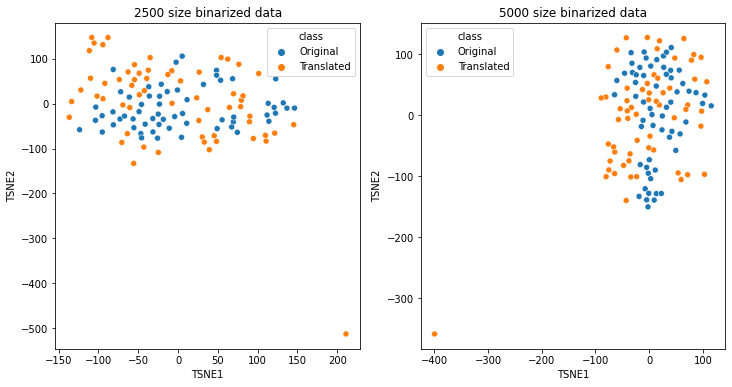

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].set_title('2500 size binarized data')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=data2500_bin, palette='tab10', ax=ax[0]);

ax[1].set_title('5000 size binarized data')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=data5000_bin, palette='tab10', ax=ax[1]);

Representando con TSNE las matrices con la información binaria de un conjunto de palabras vemos lo siguiente. En ambas figuras podemos ver como se generan diferentes nubes de puntos que forman parte de las clases *Original* y *Translated*. A pesar de que claramente no sean clases linealmente separables, estas dos clases si son separables,aunque sea de forma algo más compleja.

##  Frequency

In [8]:
X2500_freq_tsne = TSNE(perplexity=15, early_exaggeration=15, metric='cosine', n_jobs=-1).fit_transform(X2500_freq_train)
data2500_freq = pd.DataFrame({'TSNE1':X2500_freq_tsne[:,0], 'TSNE2':X2500_freq_tsne[:,1],'class':y2500_freq_train})

X5000_freq_tsne = TSNE(perplexity=15, early_exaggeration=15, metric='cosine', n_jobs=-1).fit_transform(X5000_freq_train)
data5000_freq = pd.DataFrame({'TSNE1':X5000_freq_tsne[:,0], 'TSNE2':X5000_freq_tsne[:,1],'class':y5000_freq_train})

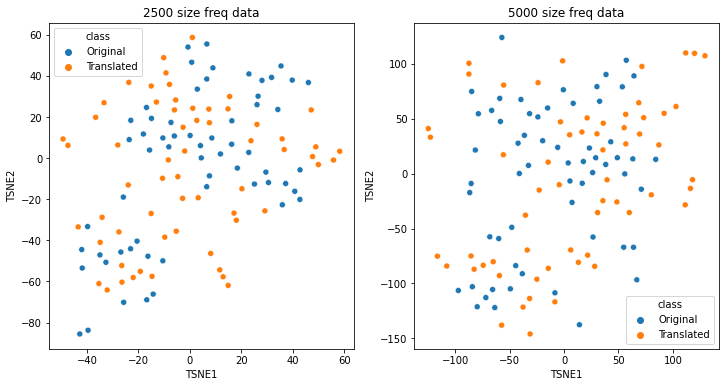

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].set_title('2500 size freq data')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=data2500_freq, palette='tab10', ax=ax[0]);

ax[1].set_title('5000 size freq data')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=data5000_freq, palette='tab10', ax=ax[1]);

Respecto a las matrices con la información de la frecuencia de aparición de ciertas palabras, podemos ver como las clases no son tan separables como antes. Aún así, podemos ver una separabilidad entre las dos clases presentes en nuestro conjunto de datos. Es claramente visible que esta división no es lineal ni mucho menos, pero no por eso deja de haber separación entre las distintas nubes que representan la clase *Original* y la clase *Translated*.

Al fin y al cabo TSNE intenta representar en menos dimensiones unos datos que deberían ser representados, para que se vieran bien, en más dimensiones.

# Apartado c

Tal y como hemos divido los datos en diferentes matrices, tenemos datos que o son binarios (Bernoulli) o corresponden a distribuciones multinomiales (Multinomial) respectivamente. Si asumimos que las palabras de un texto son independientes, a pesar de que no lo son realmente, podemos usar Naïve Bayes para clasificarlos.

Vamos a definir una función auxiliar que nos permitirá ir guardando los resultados obtenidos para luego poder comprarlos todos con mayor facilidad y claridad.

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def save_results(clf, X_test, y_test, nclf, df):
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (W)'] = precision_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'recall score (W)'] = recall_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'f1 score (W)'] = f1_score(y_test, clf.predict(X_test), average='weighted')
    return df

results_df = pd.DataFrame()

## Binary

Primero clasificamos las matrices con valores binarios a través de un modelo basado en *Bernoulli*. Ajustamos un modelo para cada una de las matrices con datos binarios, la que contiene 2500 individuos y la que contiene 5000.

### 2500 sample size

In [11]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report

model = BernoulliNB().fit(X2500_bin_train, y2500_bin_train)
y_pred = model.predict(X2500_bin_test)

print('Accuracy obtained:', accuracy_score(y2500_bin_test, y_pred))
print(classification_report(y2500_bin_test, y_pred))

Accuracy obtained: 0.7666666666666667
              precision    recall  f1-score   support

    Original       0.78      0.74      0.76       240
  Translated       0.75      0.80      0.77       240

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480



Por un lado, de entre todas las instancias clasificadas como *Original* realmente el 0.78 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Original*, nuestro modelo ha sido capaz de identificar un 0.74 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.76.

Por un lado, de entre todas las instancias clasificadas como *Translated* realmente el 0.75 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Translated*, nuestro modelo ha sido capaz de identificar un 0.80 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.77.

Tenemos una precisión general del modelo com un valor de 0.77 aproximadamente.

In [12]:
results_df = save_results(model, X2500_bin_test, y2500_bin_test, 'Bernoulli 2500 bin', results_df)

### 5000 sample size

In [13]:
model = BernoulliNB().fit(X5000_bin_train, y5000_bin_train)
y_pred = model.predict(X5000_bin_test)

print('Accuracy obtained:', accuracy_score(y5000_bin_test, y_pred))
print(classification_report(y5000_bin_test, y_pred))

Accuracy obtained: 0.775
              precision    recall  f1-score   support

    Original       0.82      0.70      0.76       240
  Translated       0.74      0.85      0.79       240

    accuracy                           0.78       480
   macro avg       0.78      0.77      0.77       480
weighted avg       0.78      0.78      0.77       480



Por un lado, de entre todas las instancias clasificadas como *Original* realmente el 0.82 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Original*, nuestro modelo ha sido capaz de identificar un 0.70 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.76.

Por un lado, de entre todas las instancias clasificadas como *Translated* realmente el 0.74 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Translated*, nuestro modelo ha sido capaz de identificar un 0.85 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.79.

Tenemos una precisión general del modelo com un valor de 0.775.

En ambos modelos podemos ver que se alcanza una precisión razonablemente buena para el tipo de problema que estamos intentando predecir. Es perceptible que en los dos modelos que hemos generado, hay una pequeña tendencia en clasificar más a los individuso como *Translated* antes que como *Original*, podemos deducir esto a través de comparar los valores de *recall* para ambas clases.

In [14]:
results_df = save_results(model, X5000_bin_test, y5000_bin_test, 'Bernoulli 5000 bin', results_df)

## Frequency

Ahora vamos a clasificar las matrices con valores multinomiales a través de un modelo basado en *Multinomial*. Ajustamos un modelo para cada una de las matrices con datos multinomiales, la que contiene 2500 individuos y la que contiene 5000.

### 2500 sample size

In [15]:
model = MultinomialNB().fit(X2500_freq_train, y2500_freq_train)
y_pred = model.predict(X2500_freq_test)

print('Accuracy obtained:', accuracy_score(y2500_freq_test, y_pred))
print(classification_report(y2500_freq_test, y_pred))

Accuracy obtained: 0.8229166666666666
              precision    recall  f1-score   support

    Original       0.82      0.82      0.82       240
  Translated       0.82      0.82      0.82       240

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480



Por un lado, de entre todas las instancias clasificadas como *Original* realmente el 0.82 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Original*, nuestro modelo ha sido capaz de identificar un 0.82 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.82.

Por un lado, de entre todas las instancias clasificadas como *Translated* realmente el 0.82 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Translated*, nuestro modelo ha sido capaz de identificar un 0.82 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.82.

Tenemos una precisión general del modelo com un valor de 0.823 aproximadamente.

In [16]:
results_df = save_results(model, X2500_freq_test, y2500_freq_test, 'Multinomial 2500 freq', results_df)

### 5000 sample size

In [17]:
model = MultinomialNB().fit(X5000_freq_train, y5000_freq_train)
y_pred = model.predict(X5000_freq_test)

print('Accuracy obtained:', accuracy_score(y5000_freq_test, y_pred))
print(classification_report(y5000_freq_test, y_pred))

Accuracy obtained: 0.8479166666666667
              precision    recall  f1-score   support

    Original       0.85      0.85      0.85       240
  Translated       0.85      0.85      0.85       240

    accuracy                           0.85       480
   macro avg       0.85      0.85      0.85       480
weighted avg       0.85      0.85      0.85       480



Por un lado, de entre todas las instancias clasificadas como *Original* realmente el 0.85 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Original*, nuestro modelo ha sido capaz de identificar un 0.85 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.85.

Por un lado, de entre todas las instancias clasificadas como *Translated* realmente el 0.85 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Translated*, nuestro modelo ha sido capaz de identificar un 0.85 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.85.

Tenemos una precisión general del modelo com un valor de 0.85 aproximadamente.

En ambos modelos podemos ver que se alcanza una precisión razonablemente buena para el tipo de problema que estamos intentando predecir. Como conlusión general, comparando los modelos para las diferentes matrices, podemos afirmar que los resultados obtenidos con la matriz que almacena la frecuencia de aparición de palabras es algo mejor a la hora de predecir las dos clases.

In [18]:
results_df = save_results(model, X5000_freq_test, y5000_freq_test, 'Multinomial 5000 freq', results_df)

# Apartado d

Los modelos lineales funcionan bien si existe una buena separación entre las clases, pero la frontera puede ser suficientemente compleja para que no podamos superar cierto límite. El modelo de k vecinos cercanos si puede aproximar fronteras complejas y parece adecuado para este problema. Es por esto que vamos a ajustar un modelo de Knn a los conjuntos de datos, explorando sus hiperparámetros, y determinando la calidad de los mejores modelos.

El primer paso será normalizar nuestros conjuntos de datos para poder obtener mejores resultados. Utilizamos el transformador *Normalizer*, de la librería *scikit-learn*, que normaliza los valores de las muestras individualmente a la norma unitaria.

In [19]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

X2500_bin_train_s = scaler.fit_transform(X2500_bin_train)
X2500_bin_test_s = scaler.transform(X2500_bin_test)

X5000_bin_train_s = scaler.fit_transform(X5000_bin_train)
X5000_bin_test_s = scaler.transform(X5000_bin_test)

X2500_freq_train_s = scaler.fit_transform(X2500_freq_train)
X2500_freq_test_s = scaler.transform(X2500_freq_test)

X5000_freq_train_s = scaler.fit_transform(X5000_freq_train)
X5000_freq_test_s = scaler.transform(X5000_freq_test)

## Binary

### 2500 sample size

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn =  KNeighborsClassifier()
cv = 10
param = {'n_neighbors':[1, 3, 5, 7, 11, 15, 17, 21], 
          'weights':['distance', 'uniform'], 
          'leaf_size':[1, 5, 10, 20, 30],
          'metric': ['l2', 'l1', 'cosine']}

In [21]:
model =  GridSearchCV(knn, param, cv=cv, n_jobs=-1)
model.fit(X2500_bin_train_s, y2500_bin_train);

show_html(pd.DataFrame(model.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html());

,params,mean_test_score,rank_test_score
68,"{'leaf_size': 5, 'metric': 'l1', 'n_neighbors': 5, 'weights': 'distance'}",0.783,1
21,"{'leaf_size': 1, 'metric': 'l1', 'n_neighbors': 5, 'weights': 'uniform'}",0.783,1
117,"{'leaf_size': 10, 'metric': 'l1', 'n_neighbors': 5, 'weights': 'uniform'}",0.783,1
69,"{'leaf_size': 5, 'metric': 'l1', 'n_neighbors': 5, 'weights': 'uniform'}",0.783,1
212,"{'leaf_size': 30, 'metric': 'l1', 'n_neighbors': 5, 'weights': 'distance'}",0.783,1


Podemos ver que parámetros nos han dado mejores resultados a través de hacer la exploración con *GridSearch*.

In [22]:
predictions_2500_bin = model.predict(X2500_bin_test_s);

In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y2500_bin_test, predictions_2500_bin))

[[197  43]
 [ 85 155]]


Podemos ver que hay un gran número de valores que son acertados (True positive y True negative). Destacar también que cuando más error se produce es con valores que son predichos como negativos cuando en verdad son positivos.

In [24]:
print('Accuracy obtained:', accuracy_score(y2500_bin_test, predictions_2500_bin))
print(classification_report(y2500_bin_test, predictions_2500_bin))

Accuracy obtained: 0.7333333333333333
              precision    recall  f1-score   support

    Original       0.70      0.82      0.75       240
  Translated       0.78      0.65      0.71       240

    accuracy                           0.73       480
   macro avg       0.74      0.73      0.73       480
weighted avg       0.74      0.73      0.73       480



Por un lado, de entre todas las instancias clasificadas como *Original* realmente el 0.70 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Original*, nuestro modelo ha sido capaz de identificar un 0.82 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.75.

Por un lado, de entre todas las instancias clasificadas como *Translated* realmente el 0.78 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Translated*, nuestro modelo ha sido capaz de identificar un 0.65 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.71.

Tenemos una precisión general del modelo com un valor de 0.733 aproximadamente. Podemos ver como este modelo se centra más en identificar correctamente la clase *Original*.

In [25]:
results_df = save_results(model, X2500_bin_test_s, y2500_bin_test, 'k-NN 2500 bin', results_df)

### 5000 sample size

In [26]:
model =  GridSearchCV(knn, param, cv=cv, n_jobs=-1);
model.fit(X5000_bin_train_s, y5000_bin_train);

show_html(pd.DataFrame(model.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html());

,params,mean_test_score,rank_test_score
147,"{'leaf_size': 20, 'metric': 'l2', 'n_neighbors': 3, 'weights': 'uniform'}",0.808,1
34,"{'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}",0.808,1
35,"{'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 3, 'weights': 'uniform'}",0.808,1
83,"{'leaf_size': 5, 'metric': 'cosine', 'n_neighbors': 3, 'weights': 'uniform'}",0.808,1
82,"{'leaf_size': 5, 'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}",0.808,1


Podemos con que parámetros hemos obtenido los mejores resultados a través de hacer la exploración con *GridSearch*.

In [27]:
predictions_5000_bin = model.predict(X5000_bin_test_s);

In [28]:
print(confusion_matrix(y5000_bin_test, predictions_5000_bin))

[[189  51]
 [ 49 191]]


Al igual que con la muestra con 2500 individuos, podemos ver que hay un gran número de valores que son acertados (True positive y True negative).

In [29]:
print('Accuracy obtained:', accuracy_score(y5000_bin_test, predictions_5000_bin))
print(classification_report(y5000_bin_test, predictions_5000_bin))

Accuracy obtained: 0.7916666666666666
              precision    recall  f1-score   support

    Original       0.79      0.79      0.79       240
  Translated       0.79      0.80      0.79       240

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



Por un lado, de entre todas las instancias clasificadas como *Original* realmente el 0.79 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Original*, nuestro modelo ha sido capaz de identificar un 0.79 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.79.

Por un lado, de entre todas las instancias clasificadas como *Translated* realmente el 0.79 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Translated*, nuestro modelo ha sido capaz de identificar un 0.80 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.79.

Tenemos una precisión general del modelo com un valor de 0.792 aproximadamente.

In [30]:
results_df = save_results(model, X5000_bin_test_s, y5000_bin_test, 'k-NN 5000 bin', results_df)

## Frequency

### 2500 sample size

In [31]:
model =  GridSearchCV(knn, param, cv=cv, n_jobs=-1);
model.fit(X2500_freq_train_s, y2500_freq_train);

show_html(pd.DataFrame(model.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html());

,params,mean_test_score,rank_test_score
39,"{'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'uniform'}",0.783,1
103,"{'leaf_size': 10, 'metric': 'l2', 'n_neighbors': 7, 'weights': 'uniform'}",0.783,1
230,"{'leaf_size': 30, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'distance'}",0.783,1
231,"{'leaf_size': 30, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'uniform'}",0.783,1
38,"{'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'distance'}",0.783,1


Aquí vemos que parámetros nos han dado mejores resultados a través de hacer la exploración con *GridSearch*.

In [32]:
predictions_2500_freq = model.predict(X2500_freq_test_s);

In [33]:
print(confusion_matrix(y2500_freq_test, predictions_2500_freq))

[[208  32]
 [ 70 170]]


Podemos ver que hay un gran número de valores que son acertados (True positive y True negative). Al igual que nos pasaba con los datos binarios, y prácticamente en igual porporción, cuando más error se produce es con valores que son predichos como negativos cuando en verdad son positivos.

In [34]:
print('Accuracy obtained:', accuracy_score(y2500_freq_test, predictions_2500_freq))
print(classification_report(y2500_freq_test, predictions_2500_freq))

Accuracy obtained: 0.7875
              precision    recall  f1-score   support

    Original       0.75      0.87      0.80       240
  Translated       0.84      0.71      0.77       240

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



Por un lado, de entre todas las instancias clasificadas como *Original* realmente el 0.75 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Original*, nuestro modelo ha sido capaz de identificar un 0.87 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.80.

Por un lado, de entre todas las instancias clasificadas como *Translated* realmente el 0.84 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Translated*, nuestro modelo ha sido capaz de identificar un 0.71 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.77.

Tenemos una precisión general del modelo com un valor de 0.79 aproximadamente.

In [35]:
results_df = save_results(model, X2500_freq_test_s, y2500_freq_test, 'k-NN 2500 freq', results_df)

### 5000 sample size

In [36]:
model =  GridSearchCV(knn, param, cv=cv, n_jobs=-1);
model.fit(X5000_freq_train_s, y5000_freq_train);

show_html(pd.DataFrame(model.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html());

,params,mean_test_score,rank_test_score
183,"{'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'uniform'}",0.767,1
149,"{'leaf_size': 20, 'metric': 'l2', 'n_neighbors': 5, 'weights': 'uniform'}",0.767,1
150,"{'leaf_size': 20, 'metric': 'l2', 'n_neighbors': 7, 'weights': 'distance'}",0.767,1
151,"{'leaf_size': 20, 'metric': 'l2', 'n_neighbors': 7, 'weights': 'uniform'}",0.767,1
103,"{'leaf_size': 10, 'metric': 'l2', 'n_neighbors': 7, 'weights': 'uniform'}",0.767,1


Aquí vemos que parámetros nos han dado mejores resultados a través de hacer la exploración con *GridSearch*.

In [37]:
predictions_5000_freq = model.predict(X5000_freq_test_s);

In [38]:
print(confusion_matrix(y5000_freq_test, predictions_5000_freq))

[[200  40]
 [ 68 172]]


Al igual que con las muestras de valores binarios y la muestra anterior, podemos ver que hay un gran número de valores que son acertados (True positive y True negative). Destacar también que cuando más error se produce es con valores que son predichos como negativos cuando en verdad son positivos.

In [39]:
print('Accuracy obtained:', accuracy_score(y5000_freq_test, predictions_5000_freq))
print(classification_report(y5000_freq_test, predictions_5000_freq))

Accuracy obtained: 0.775
              precision    recall  f1-score   support

    Original       0.75      0.83      0.79       240
  Translated       0.81      0.72      0.76       240

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.77       480
weighted avg       0.78      0.78      0.77       480



Por un lado, de entre todas las instancias clasificadas como *Original* realmente el 0.75 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Original*, nuestro modelo ha sido capaz de identificar un 0.83 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.79.

Por otro lado, de entre todas las instancias clasificadas como *Translated* realmente el 0.81 de estas pertenecían a dicha clase. De todos los individuos que si formaban parte de la clase *Translated*, nuestro modelo ha sido capaz de identificar un 0.72 de estos. El valor f1-score representa una media harmoniosa entre ambos resultados y tiene un valor de 0.76.

Tenemos una precisión general del modelo com un valor de 0.78 aproximadamente. Podemos ver como este modelo se centra más en identificar correctamente la clase *Original*.

In [40]:
results_df = save_results(model, X5000_freq_test_s, y5000_freq_test, 'k-NN 5000 freq', results_df)

## Conclusión

Vamos a ver y a poner en común los resultados obtenidos a lo largo del problema para concluir que modelo, y por qué, escogeremos como modelo final a utilizar.

In [41]:
results_df.sort_values(by=['test acc'], ascending=False)

,test acc,precision score (W),recall score (W),f1 score (W)
Multinomial 5000 freq,0.848,0.848,0.848,0.848
Multinomial 2500 freq,0.823,0.823,0.823,0.823
k-NN 5000 bin,0.792,0.792,0.792,0.792
k-NN 2500 freq,0.787,0.795,0.787,0.786
Bernoulli 5000 bin,0.775,0.781,0.775,0.774
k-NN 5000 freq,0.775,0.779,0.775,0.774
Bernoulli 2500 bin,0.767,0.768,0.767,0.766
k-NN 2500 bin,0.733,0.741,0.733,0.731


Viendo los resultados que hemos obtenido la mejor elección para escoger el modelo que utilizaremos, es el *Multinomial 5000 freq*. Utiliza un modelo de Naive Bayes con una distribución multinomial sobre la matriz de datos con 5000 individuos que representaban la frecuencia de aparición de un conjunto de palabras sobre los textos.

Este modelo no ha sido únicamente menos costoso que, por ejemplo los modelos basados en k vecinos, sinó que además nos proporciona mejores resultados. Másde un 10% de acierto que alguno de los otros modelos que hemos entrenado.